# Answers for the Lab01.1 questions
## Imports from libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns

<Figure size 432x288 with 0 Axes>

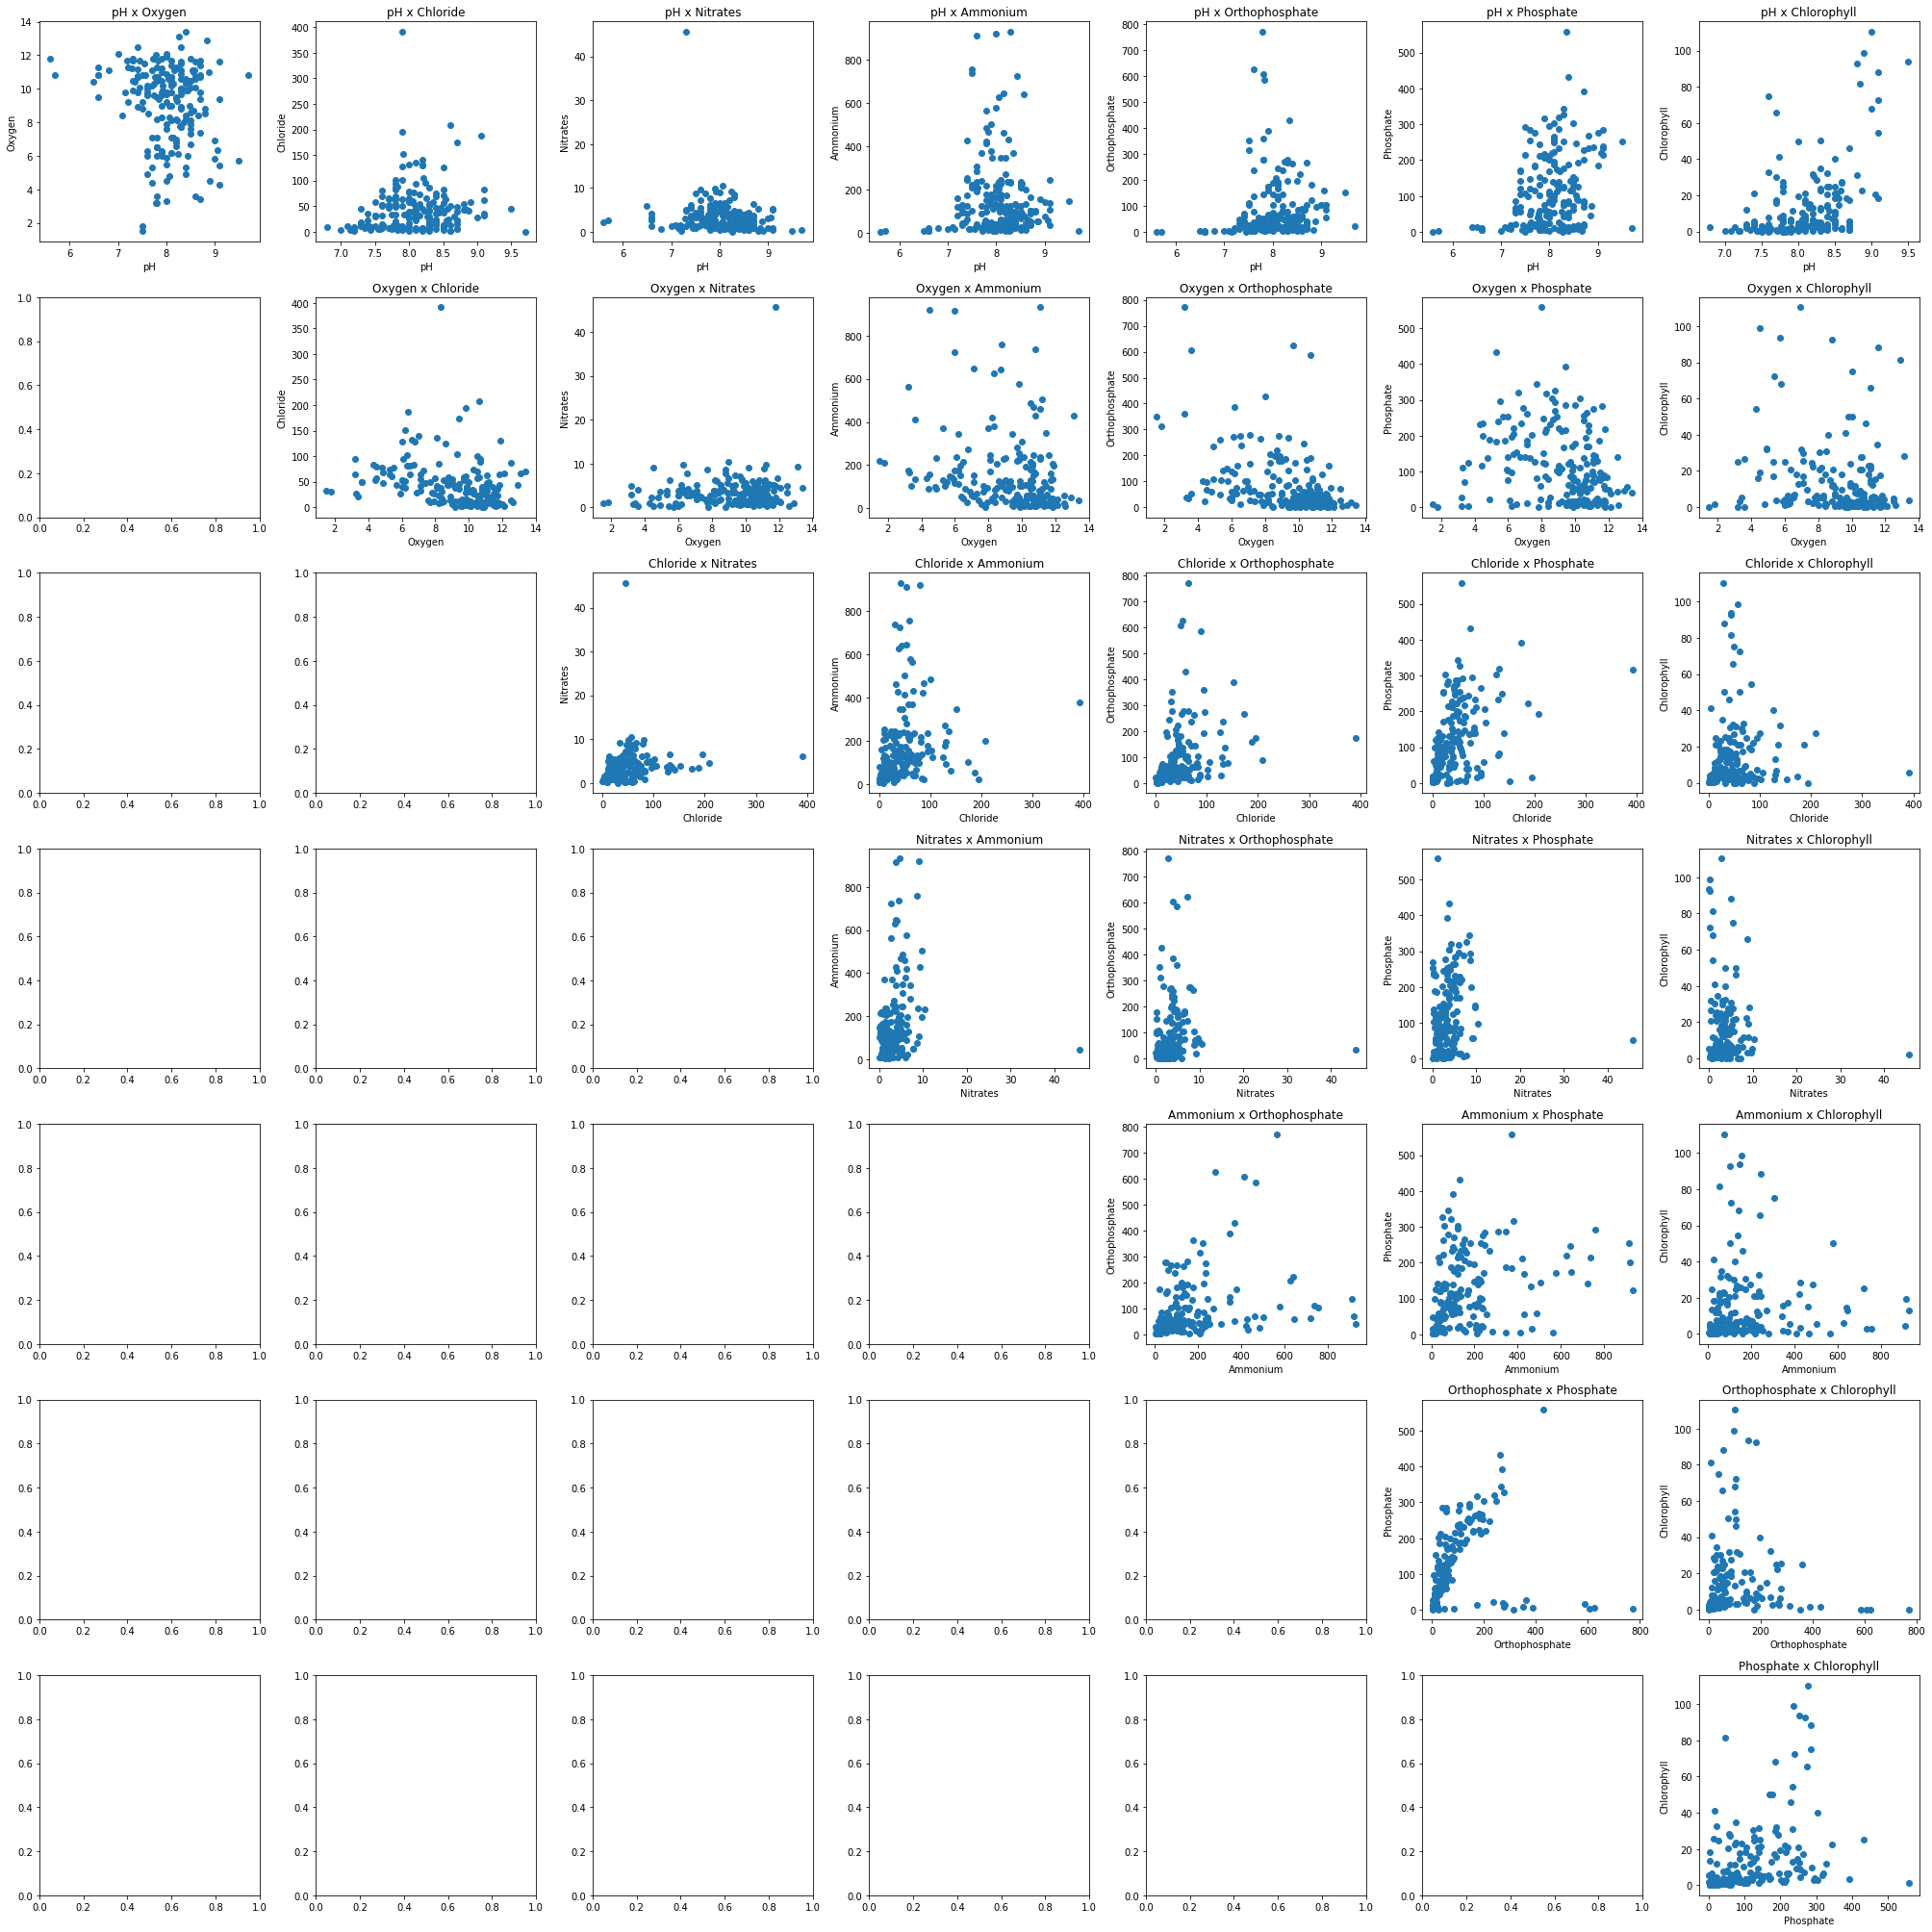

In [2]:
register_matplotlib_converters()
data = pd.read_csv('datasets/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)

columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

    1. Explore pH and Ammonium variables together.
        A.Are they in the same scale? Discuss implications.

In [3]:
data[['pH', 'Ammonium']].describe()

,pH,Ammonium
count,199.000000,198.000000
mean,8.011759,154.447475
std,0.598302,180.011207
min,5.600000,5.000000
25%,7.700000,35.625000
50%,8.060000,99.665000
75%,8.400000,203.730000
max,9.700000,931.830000


They are not in the same scale. pH varies between 5.6 and 9.7, and Ammonium varies between 5 and 931.83.
So, for example, on KNN it would make pH have less influency on the result because of the distance between each point

        B.Are they independent?

In [4]:
analysis = data[['pH', 'Ammonium']]
analysis.isna().sum()

pH          1
Ammonium    2
dtype: int64

In [5]:
imp = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp.fit(analysis.values)
mat = imp.transform(analysis.values)
new_data = pd.DataFrame(mat, columns=analysis.columns)
new_data.describe()

,pH,Ammonium
count,200.000000,200.000000
mean,8.011759,154.447475
std,0.596797,179.104344
min,5.600000,5.000000
25%,7.700000,36.875000
50%,8.055000,101.125000
75%,8.400000,199.850000
max,9.700000,931.830000


In [6]:
# normalization per sample (it just makes sense when the features have the same distribuition/scale, example: proteins in cells)
transf_sample = Normalizer().fit(new_data)
norm_data_sample = pd.DataFrame(transf_sample.transform(new_data, copy=True), columns= new_data.columns)
norm_data_sample.describe(include='all')

#normalization per feature (most of the times we use this)
transf = Normalizer().fit(new_data.T)
norm_data = pd.DataFrame(transf.transform(new_data.T, copy=True), columns= new_data.T.columns)
norm_data = norm_data.T
norm_data.describe(include='all')

,0,1
count,200.000000,200.000000
mean,0.070516,0.046244
std,0.005253,0.053627
min,0.049289,0.001497
25%,0.067772,0.011041
50%,0.070897,0.030279
75%,0.073933,0.059839
max,0.085376,0.279006


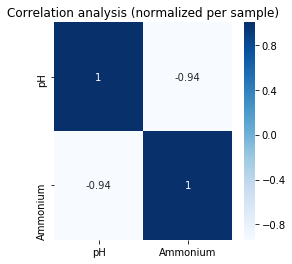

In [7]:
fig = plt.figure(figsize=[4, 4])
corr_mtx = norm_data_sample.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis (normalized per sample)')
plt.show()

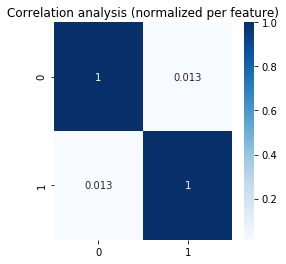

In [8]:
fig = plt.figure(figsize=[4, 4])
corr_mtx = norm_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis (normalized per feature)')
plt.show()

    2. Look for dependent variables.

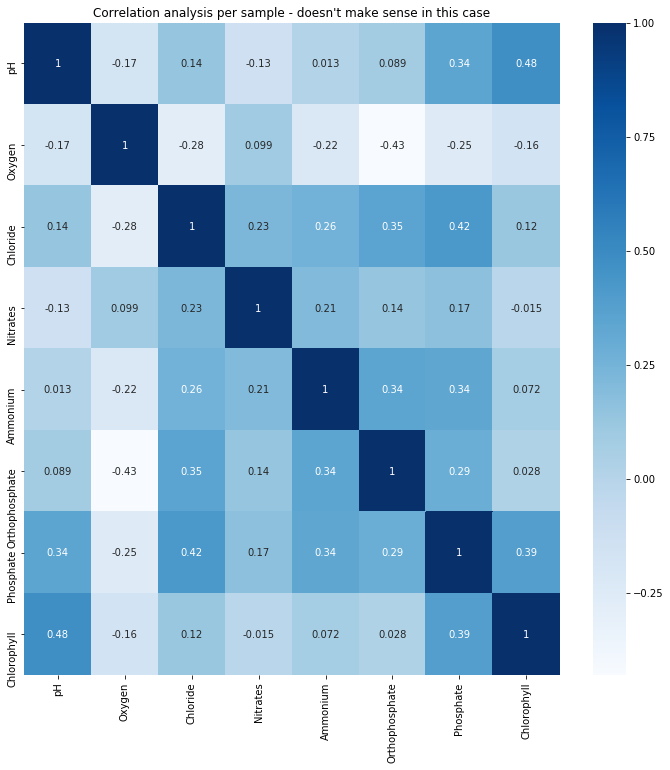

In [9]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis per sample - doesn\'t make sense in this case')
plt.show()

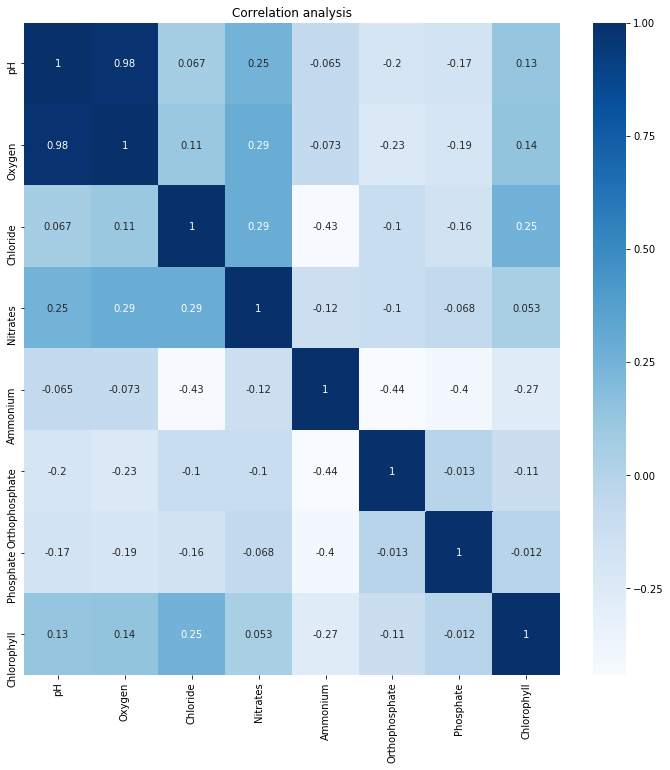

In [10]:
numeric_data = data.select_dtypes(include='number')

imp = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp.fit(numeric_data.values)
mat = imp.transform(numeric_data.values)
new_data = pd.DataFrame(mat, columns=numeric_data.columns)

transf_sample = Normalizer().fit(new_data)
norm_data_sample = pd.DataFrame(transf_sample.transform(new_data, copy=True), columns= new_data.columns)
norm_data_sample.describe(include='all')

fig = plt.figure(figsize=[12, 12])
corr_mtx = norm_data_sample.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

The closer variables (looking only for the graph without sample normalization) to be dependent are pH and Chlorophyll.

    3. What about dimensionality?

In [11]:
data.shape

(200, 11)

The dataset has 11 attributes and the greater correlation between 2 is 0.48, so it may not be so useful to reduce de dimensionality this way.